<a href="https://colab.research.google.com/github/arpitgope/SCT_DS_4/blob/main/Traffic_Accident_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  Accident_ID           State        Date      Time                Reason  \
0        1001  Andhra Pradesh  2021-05-01  15:30:00              Speeding   
1        1002       Karnataka  2021-05-02  18:45:00         Drunk Driving   
2        1003           Delhi  2021-05-03  10:15:00  Poor Road Conditions   
3        1004     Maharashtra  2021-05-04  06:00:00        Driver Fatigue   
4        1005   Uttar Pradesh  2021-05-05  21:20:00              Speeding   

   Number_of_Deaths Number_of_Injuries Road_Type Weather_Conditions  \
0                 2                  3     Rural              Sunny   
1                 1                  4     Urban              Rainy   
2                 0                  2     Urban              Foggy   
3                 3                  6     Rural              Sunny   
4                 1                  2     Rural              Sunny   

  Alcohol_Involved Driver_Fatigue Road_Conditions  Speed_Limit  
0               No             No            

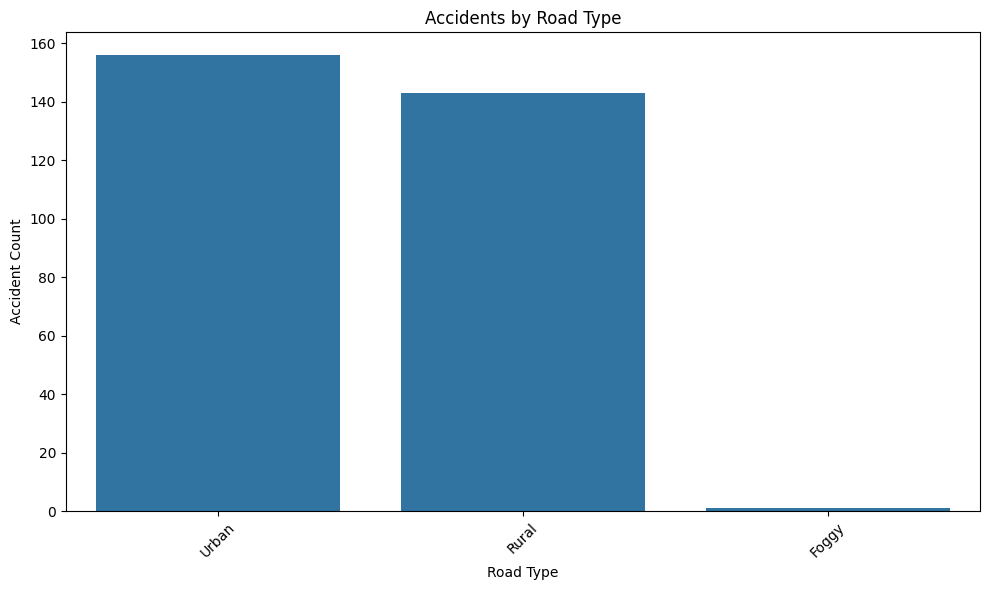

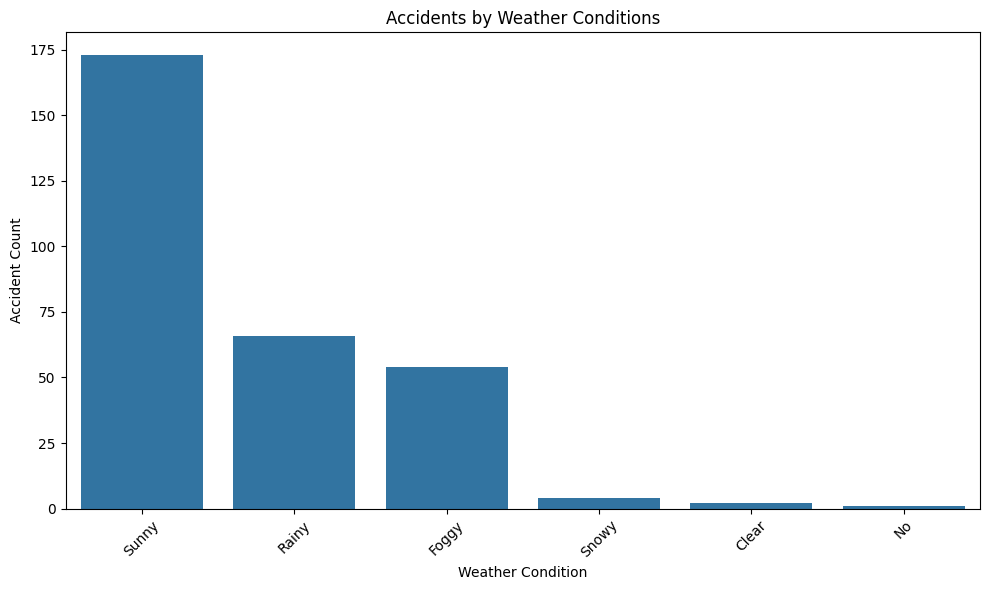

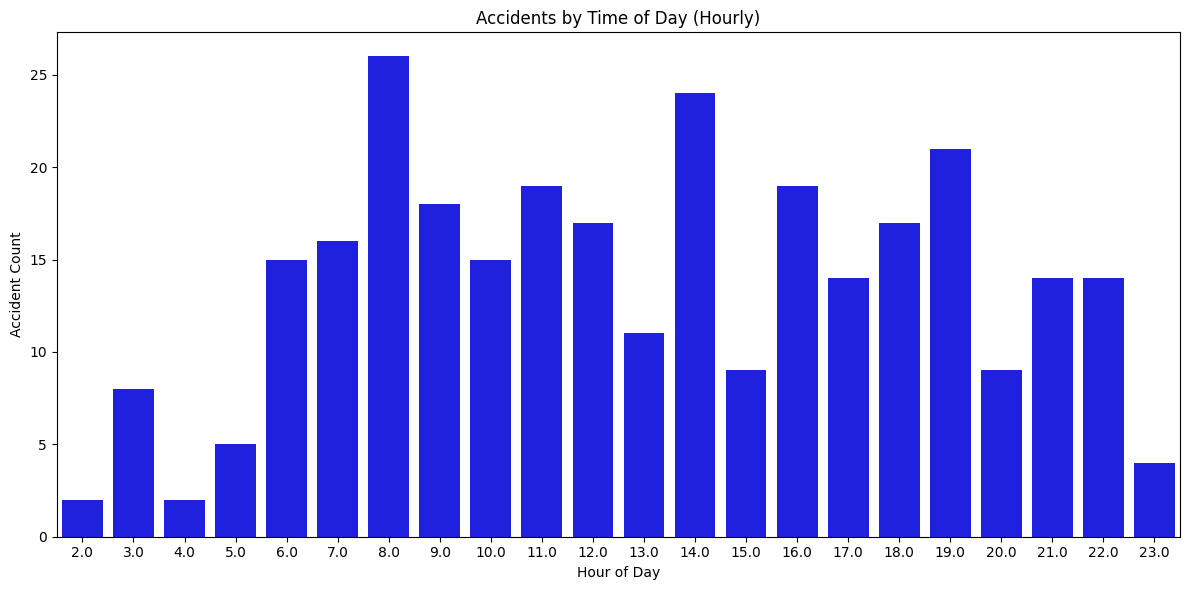

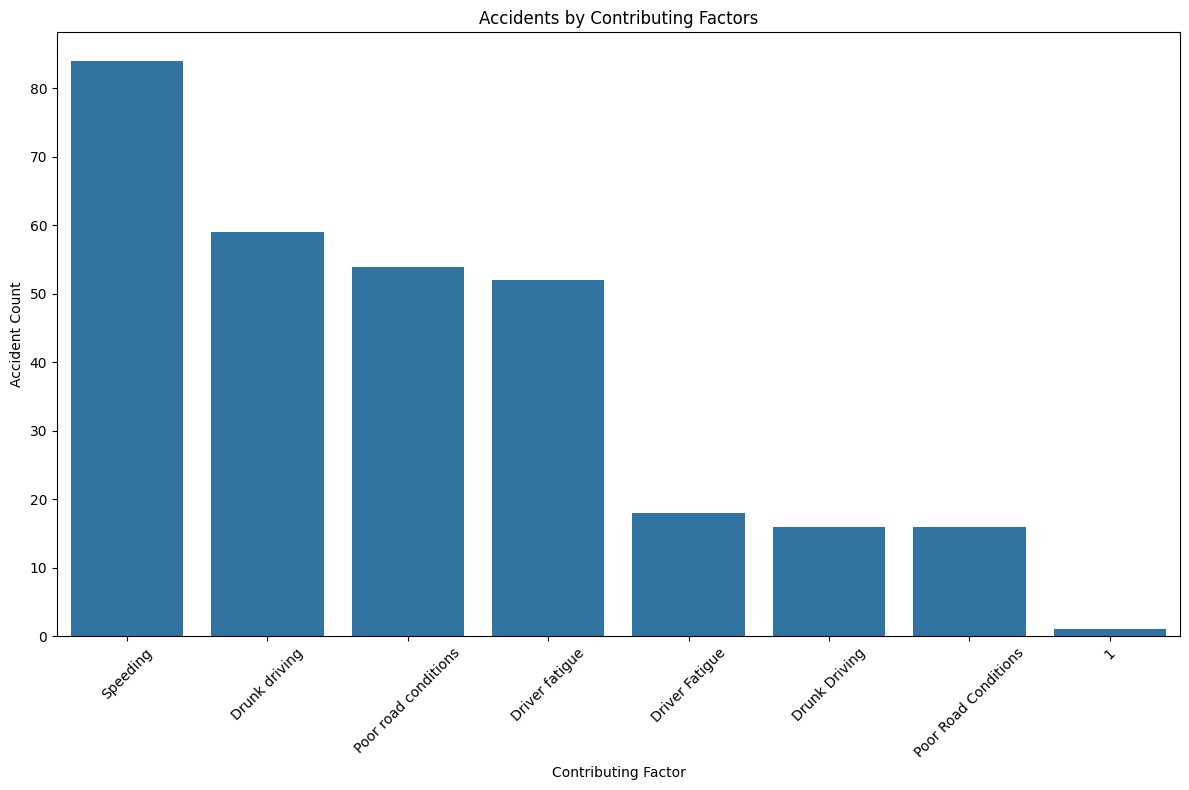

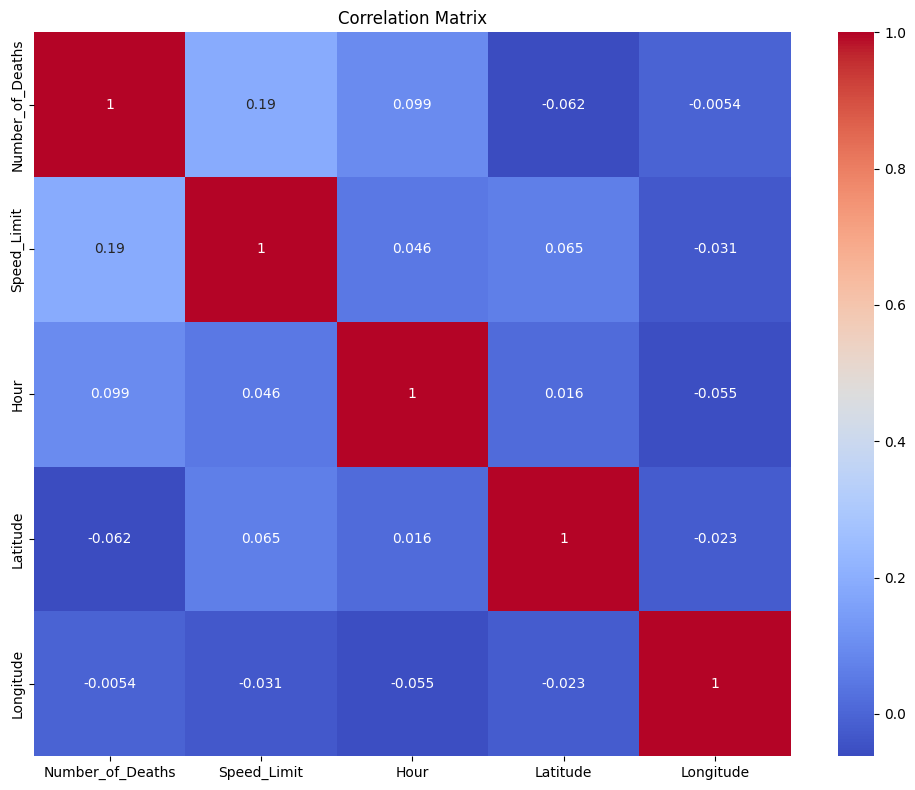

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium  # Import folium library
from folium.plugins import HeatMap
import random

# Load the dataset from the CSV file
file_path = '/content/accident.csv'  # Replace with the actual path to your CSV file
df = pd.read_csv('/content/accident.csv')

# Display the first few rows of the dataset to ensure it's loaded correctly
print(df.head())

# Check for non-time values in the 'Time' column and handle them
# Replace non-time values with NaT (Not a Time)
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S', errors='coerce')

# Plot accidents by road conditions (assuming 'Road_Type' is the column name)
plt.figure(figsize=(10, 6))
sns.countplot(x='Road_Type', data=df, order=df['Road_Type'].value_counts().index)
plt.title('Accidents by Road Type')
plt.xticks(rotation=45)
plt.xlabel('Road Type')
plt.ylabel('Accident Count')
plt.tight_layout()
plt.show()

# Plot accidents by weather conditions
plt.figure(figsize=(10, 6))
sns.countplot(x='Weather_Conditions', data=df, order=df['Weather_Conditions'].value_counts().index)
plt.title('Accidents by Weather Conditions')
plt.xticks(rotation=45)
plt.xlabel('Weather Condition')
plt.ylabel('Accident Count')
plt.tight_layout()
plt.show()

# Plot accidents by time of day (hourly)
plt.figure(figsize=(12, 6))
df['Hour'] = df['Time'].dt.hour
sns.countplot(x='Hour', data=df, color='blue')
plt.title('Accidents by Time of Day (Hourly)')
plt.xlabel('Hour of Day')
plt.ylabel('Accident Count')
plt.tight_layout()
plt.show()

# Plot accidents by contributing factors (Reason column)
plt.figure(figsize=(12, 8))
sns.countplot(x='Reason', data=df, order=df['Reason'].value_counts().index)
plt.title('Accidents by Contributing Factors')
plt.xlabel('Contributing Factor')
plt.ylabel('Accident Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Assuming latitude_center and longitude_center are defined for your area of interest
# Create a base map
latitude_center = 37.7749  # Replace with actual latitude center
longitude_center = -122.4194  # Replace with actual longitude center
accident_map = folium.Map(location=[latitude_center, longitude_center], zoom_start=5)

# Add heatmap for accident hotspots (assuming latitude and longitude columns are available)
# For simplicity, generating mock latitude and longitude data
df['Latitude'] = [random.uniform(37.6, 37.9) for _ in range(len(df))]
df['Longitude'] = [random.uniform(-122.6, -122.3) for _ in range(len(df))]

# Create a list of lists containing latitude, longitude, and intensity (which is just 1 for each record)
heat_data = [[row['Latitude'], row['Longitude'], 1] for index, row in df.iterrows()]

# Add heatmap to the map
HeatMap(heat_data).add_to(accident_map)

# Display the map
accident_map.save('accident_hotspots.html')

# Select numeric columns for correlation analysis
# Exclude 'Road_Type', 'Latitude', and 'Longitude' as they are non-numeric for correlation
numeric_columns = ['Number_of_Deaths', 'Number_of_Injuries', 'Speed_Limit']

# Select only numerical columns for correlation analysis
numerical_df = df.select_dtypes(include=['number'])

# Explore correlations between numerical variables
correlation_matrix = numerical_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()